In [13]:
import sys
# !{sys.executable} -m pip3 install pandas
# !{sys.executable} -m pip3 install numpy
# !{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install matplotlib

  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


You should consider upgrading via the 'c:\users\majid\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pandas.options.mode.chained_assignment = None

In [2]:
# part1: Reading file and show firs 5 rows of it
covid = pandas.read_csv('covid.csv', index_col='id')
covid.head(200)

,sex,birth_year,country,region,infection_reason,infected_by,confirmed_date,state
id,,,,,,,,
1,female,1984.0,China,filtered at airport,visit to Wuhan,NaN,1/20/2020,released
2,male,1964.0,Korea,filtered at airport,visit to Wuhan,NaN,1/24/2020,released
3,male,1966.0,Korea,capital area,visit to Wuhan,NaN,1/26/2020,released
4,male,1964.0,Korea,capital area,visit to Wuhan,NaN,1/27/2020,released
5,male,1987.0,Korea,capital area,visit to Wuhan,NaN,1/30/2020,released
...,...,...,...,...,...,...,...,...
172,female,1997.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated
173,male,1949.0,Korea,Daegu,NaN,NaN,2/24/2020,deceased
174,female,1958.0,Korea,Gyeongsangbuk-do,NaN,NaN,2/24/2020,isolated


In [3]:
# part2: Printing number of rows in file
print("Number of rows: " + str(len(covid.axes[0])))

Number of rows: 176


In [4]:
# part3: Printing max and mean and std of birth year of data 
# At first we remove nan values
birth_year = list(covid['birth_year'].dropna())
print("Mean of years: " + str(np.mean(birth_year)))
print("Maximum of years: " + str(np.max(birth_year)))
print("STD of years: " + str(np.std(birth_year)))

Mean of years: 1973.3855421686746
Maximum of years: 2009.0
STD of years: 16.981443682011555


In [66]:
# part4: Removing all rows that have nan value
covid2 = covid.dropna()
covid2

,sex,birth_year,country,region,infection_reason,infected_by,confirmed_date,state
id,,,,,,,,
6,male,1964.0,Korea,capital area,contact with patient,3.0,1/30/2020,released
9,female,1992.0,Korea,capital area,contact with patient,5.0,1/31/2020,released
10,female,1966.0,Korea,capital area,contact with patient,6.0,1/31/2020,released
11,male,1995.0,Korea,capital area,contact with patient,6.0,1/31/2020,released
14,female,1980.0,China,capital area,contact with patient,12.0,2/2/2020,released
15,male,1977.0,Korea,capital area,contact with patient,4.0,2/2/2020,released
18,female,1999.0,Korea,Gwangju,contact with patient,16.0,2/5/2020,released
20,female,1978.0,Korea,capital area,contact with patient,15.0,2/5/2020,released
21,female,1960.0,Korea,capital area,contact with patient,6.0,2/5/2020,released


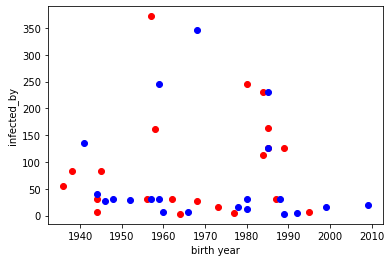

In [67]:
# part 5-1: Showing scatter plot for birth year and infected_by attrs
male = covid2[covid2['sex']=='male']
female = covid2[covid2['sex']=='female']
male_birth_years = male['birth_year']
male_infected_by = male['infected_by']
female_birth_years = female['birth_year']
female_infected_by = female['infected_by']
plt.scatter(male_birth_years, male_infected_by, c='red')
plt.scatter(female_birth_years, female_infected_by, c='blue')
plt.xlabel("birth year")
plt.ylabel("infected_by")
plt.show()

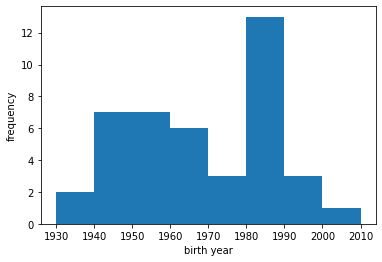

In [22]:
# part 5-2: Showing histogram for number of persons in different birth year
covid2 = covid.dropna()
birth_years = covid2['birth_year']
plt.hist(birth_years, bins=range(1930, 2020, 10))
plt.xlabel("birth year")
plt.ylabel("frequency")
plt.show()

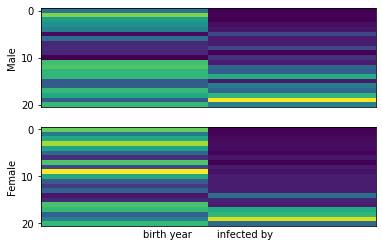

In [63]:
# part 5-3: Showing matix plot for birth year and infected_by for male and female
covid2 = covid.dropna()
min_birth_year = covid2['birth_year'].min()
max_birth_year = covid2['birth_year'].max()

min_infected_by = covid2['infected_by'].min()
max_infected_by = covid2['infected_by'].max()

covid2['birth_year'] = covid2['birth_year'].apply(lambda x: ((x - min_birth_year)/(max_birth_year-min_birth_year))*100)
covid2['infected_by'] = covid2['infected_by'].apply(lambda x: ((x - min_infected_by)/(max_infected_by-min_infected_by))*100)
male = covid2[covid2['sex']=='male']
female = covid2[covid2['sex']=='female']
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

f1 = axes[0].imshow(male[['birth_year', 'infected_by']], aspect='auto')
f2 = axes[1].imshow(female[['birth_year', 'infected_by']], aspect='auto')
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axes[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("birth year        infected by")
plt.setp(axes[0], ylabel='Male')
plt.setp(axes[1], ylabel='Female')
plt.show()

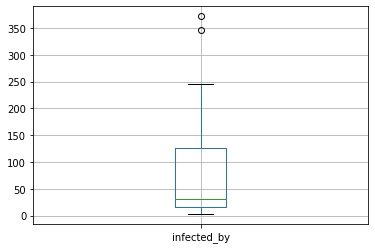

In [14]:
# part 6: Using box plot to recognize outliers 
covid2 = covid.dropna()
boxplot = covid2.boxplot(column=['infected_by'])

In [64]:
def create_data(data, degree):
    # Regression part: read data.
    new_data = [[1 for _ in range(data.shape[0])],]
    for j in range(data.shape[1]):
        for i in range(1, degree+1):
            new_data.append(data[:,j] ** i)
    new_data = np.array(new_data).T
    return new_data        

In [34]:
def data_to_matrix(degree):
    # Regression part: read data and select numeric columns and separate training and testing data
    students = pandas.read_csv('student.csv', sep=';')
    students_numeric_data = students.select_dtypes(include='int64')
    data = np.array(students_numeric_data[students_numeric_data.columns[:-1]])
    data = create_data(data, degree)
    labels = np.array(students_numeric_data[students_numeric_data.columns[-1]])
    labels = np.reshape(labels, (labels.shape[0],1)) 
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20)
    return X_train, X_test, y_train, y_test

In [35]:
def calculate_new_beta(X, y, beta, alpha):
    # Regression part: Calculate new beta for this step
    gradian = (X.T @ X @ beta) - (X.T @ y)
    gradian = gradian / np.linalg.norm(gradian)
    new_beta = beta - (alpha * gradian)
    return new_beta

In [36]:
def calculate_error(X, y, beta):
    # Regression part: Calculate error. We consider error as norm of error vector: error = ||Y-XB||
    error = np.linalg.norm((X @ beta) - y)
    return error

In [37]:
def gradient_descent(X, y, beta, alpha, number_of_steps):
    # Regression part: Do gradian descent algorithm
    for i in range(number_of_steps):
        error = calculate_error(X, y, beta)
        print('---step ' + str(i) + '------ error: ' + str(error))
        beta = calculate_new_beta(X, y, beta, alpha)
        alpha = 10/(i+1)
        if error < 0.001:
            print('error is less than 0.001')
            break
    return beta
    

In [41]:
def gradian_descent_completion(degree, number_of_steps):
    # Regression part: Get data and use gradian descen algorithm for it
    X_train, X_test, y_train, y_test = data_to_matrix(degree)
    beta = np.full((X_train.shape[1], 1), 0.1)
    alpha = 10
    beta = gradient_descent(X_train, y_train, beta, alpha, number_of_steps)
    result_of_test_data = X_test @ beta
    for i in range(result_of_test_data.shape[0]):
        print(' for student {} ### actual G3: '.format(i) + str(y_test[i][0]) + ' and predicted G3: ' + str(result_of_test_data[i][0]))

    print('error for test data:' + str(calculate_error(X_test, y_test, beta)))
    print('We consider error as norm of error vector: error = ||Y-XB||')

In [42]:
gradian_descent_completion(1, 5000) # first parameter is Polynomial degree and the second is number of steps

---step 0------ error: 92.44419938535894
---step 1------ error: 4359.138283927354
---step 2------ error: 212.34081548589887
---step 3------ error: 1980.8055243920078
---step 4------ error: 489.2434881726711
---step 5------ error: 646.9166538908075
---step 6------ error: 265.50711943549317
---step 7------ error: 494.21922963752803
---step 8------ error: 159.78338461876092
---step 9------ error: 411.9177843531885
---step 10------ error: 99.90382241171999
---step 11------ error: 360.7652450535689
---step 12------ error: 63.864203305104404
---step 13------ error: 325.95537886241345
---step 14------ error: 43.877197583527554
---step 15------ error: 300.07993240211204
---step 16------ error: 36.73875531086805
---step 17------ error: 233.78843534103967
---step 18------ error: 51.12996835196908
---step 19------ error: 218.07121122845035
---step 20------ error: 42.76070454188994
---step 21------ error: 205.52242121931917
---step 22------ error: 37.88149341566833
---step 23------ error: 194.5887